## Project Overview

In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. In this project, you will play detective, and put your new skills to use by building a person of interest identifier based on financial and email data made public as a result of the Enron scandal. To assist you in your detective work, we've combined this data with a hand-generated list of persons of interest in the fraud case, which means individuals who were indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity.

### Question 1:
Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?

The goal of this project is to use machine learning to be a detective to try and identify persons of interest (POIs) in the Enron corporate fraud case. We will acheive this goal by finding the correct machine learning algorithm to identify persons of interest. The goal is to acheive a Precision and Recall greater than .3.

In [119]:
#!/usr/bin/python
#import libraries

import sys
import pickle
from time import time
import numpy as np
import matplotlib.pyplot as plt
import pprint
from feature_format import featureFormat, targetFeatureSplit
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [136]:
# Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
    
my_dataset = data_dict

### Exploring the dataset

In [138]:
#Wanted to explore using pandas
#Create Pandas DataFrame called enron_df

enron_df = pd.DataFrame(data_dict)
enron_df = enron_df.T

enron_df.shape

(146, 21)

146 people and 21 features

In [139]:
#List of the 21 features

list(enron_df.columns)

['bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'email_address',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'poi',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

21 Features breakdown

14 - financial features: ['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)

6 - email features: ['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)

1 - POI label: [‘poi’] (boolean, represented as integer)

In [123]:
# How many POI's are there?

count = 0
for person_name in my_dataset:
    if my_dataset[person_name]["poi"] == True:
        count+=1
print count

18


Out of the 146 people, 18 of them are alreay listed as POI's.

In [124]:
#List of the POI's

for person_name in my_dataset:
    if my_dataset[person_name]["poi"] == True:
        print [person_name]

['HANNON KEVIN P']
['COLWELL WESLEY']
['RIEKER PAULA H']
['KOPPER MICHAEL J']
['SHELBY REX']
['DELAINEY DAVID W']
['LAY KENNETH L']
['BOWEN JR RAYMOND M']
['BELDEN TIMOTHY N']
['FASTOW ANDREW S']
['CALGER CHRISTOPHER F']
['RICE KENNETH D']
['SKILLING JEFFREY K']
['YEAGER F SCOTT']
['HIRKO JOSEPH']
['KOENIG MARK E']
['CAUSEY RICHARD A']
['GLISAN JR BEN F']


In [125]:
#Look at the dataset

enron_df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


I quickly notice Negative numbers and a lot of NaN's.  I also notice 'TOTAL' and 'The Travel in the park' rows.  I also see some negative numbers that might not be accurate.  EX: Robert Belfer has a negative number unde deferral_payments and no one else does.

In [140]:
#Looking at the count of NaN's
#Sorted by the features with the most NaN's

enron_df.describe().transpose().sort_values(by=['freq'], ascending=False)

,count,unique,top,freq
loan_advances,146,5,NaN,142
director_fees,146,18,NaN,129
restricted_stock_deferred,146,19,NaN,128
poi,146,2,False,128
deferral_payments,146,40,NaN,107
deferred_income,146,45,NaN,97
long_term_incentive,146,53,NaN,80
bonus,146,42,NaN,64
from_poi_to_this_person,146,58,NaN,60
from_this_person_to_poi,146,42,NaN,60


Some features have a lot of NaN's, might be better to exclude some of the top offenders.

In [175]:
# Want to see how many features have Negatives and Nan's
# Count how many Negatives and Nan's by feature.

def negative_count(my_dataset):
    negative_feature = dict((key, 0) for key, value in my_dataset['METTS MARK'].iteritems())
    for person in my_dataset:
        for key, value in my_dataset[person].iteritems():
            if value < 0:
                negative_feature[key] += 1
    return negative_feature

In [176]:
negative_feature = negative_count(my_dataset)

print(negative_feature)

{'to_messages': 0, 'deferral_payments': 1, 'expenses': 0, 'poi': 0, 'deferred_income': 48, 'email_address': 0, 'from_poi_to_this_person': 0, 'long_term_incentive': 0, 'restricted_stock_deferred': 15, 'shared_receipt_with_poi': 0, 'loan_advances': 0, 'from_messages': 0, 'other': 0, 'to_poi_ratio': 0, 'director_fees': 0, 'bonus': 0, 'total_stock_value': 1, 'from_this_person_to_poi': 0, 'from_poi_ratio': 0, 'restricted_stock': 1, 'salary': 0, 'total_payments': 0, 'exercised_stock_options': 0}


In [177]:
# Above,'deferral_payments' has 1 negative
# Looking to see what that is

for person in data_dict:
    if data_dict[person]['deferral_payments'] < 0:
        print data_dict[person]['deferral_payments']
        print person

-102500
BELFER ROBERT


Looking at the pdf.  Deferred Income is $102,500.  Looking at the data, it looks like data for Belfer got misaligned or something.  The further I look I see this happening on several occasions, so this is something I need to fix.

In [178]:
# Correcting the data for Belfer, according to the pdf

data_dict['BELFER ROBERT']['director_fees'] = 102500
data_dict['BELFER ROBERT']['deferred_income'] = -102500
data_dict['BELFER ROBERT']['deferral_payments'] = 'NaN'
data_dict['BELFER ROBERT']['expenses'] = 3285 
data_dict['BELFER ROBERT']['total_payments'] = 102500
data_dict['BELFER ROBERT']['restricted_stock'] = 44093
data_dict['BELFER ROBERT']['restricted_stock_deferred'] = -44093
data_dict['BELFER ROBERT']['total_stock_value'] = "NaN"

In [179]:
#Exploring the other negative value in 'restricted stock'

for person in data_dict:
    if data_dict[person]['restricted_stock'] < 0:
        print data_dict[person]['restricted_stock']
        print person

-2604490
BHATNAGAR SANJAY


In [180]:
# Correcting the data for Belfer, according to the pdf

data_dict['BHATNAGAR SANJAY']['exercised_stock_options'] = 15456290
data_dict['BHATNAGAR SANJAY']['restricted_stock'] = 2604490
data_dict['BHATNAGAR SANJAY']['restricted_stock_deferred'] = -2604490
data_dict['BHATNAGAR SANJAY']['total_stock_value'] = 15456290
data_dict['BHATNAGAR SANJAY']['total_payments'] = 137864
data_dict['BHATNAGAR SANJAY']['other'] = 'NaN'

In [181]:
#Check 'deferred_payments' and restricted_stock' to make sure the negatives have been fixed.

negative_feature = negative_count(my_dataset)

print(negative_feature)

{'to_messages': 0, 'deferral_payments': 0, 'expenses': 0, 'poi': 0, 'deferred_income': 49, 'email_address': 0, 'from_poi_to_this_person': 0, 'long_term_incentive': 0, 'restricted_stock_deferred': 17, 'shared_receipt_with_poi': 0, 'loan_advances': 0, 'from_messages': 0, 'other': 0, 'to_poi_ratio': 0, 'director_fees': 0, 'bonus': 0, 'total_stock_value': 0, 'from_this_person_to_poi': 0, 'from_poi_ratio': 0, 'restricted_stock': 0, 'salary': 0, 'total_payments': 0, 'exercised_stock_options': 0}


### Checking Outliers

Text(0,0.5,'bonus')

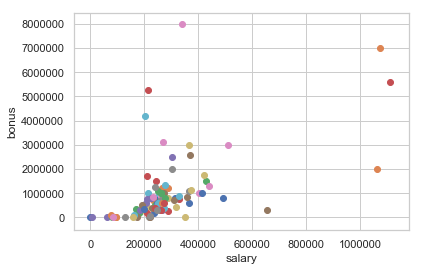

In [183]:
# I wan to plot some main features of the data just to explore a little more.
# Plotting Bonus vs Salary, Checking for the outliers

features = ["salary", "bonus"]

data = featureFormat(my_dataset, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")


In [184]:
#Need to remove 'Total' and also removed "The travel agency in the park' I noticed above"

my_dataset.pop('TOTAL')
my_dataset.pop("THE TRAVEL AGENCY IN THE PARK")



KeyError: 'TOTAL'

Text(0,0.5,'bonus')

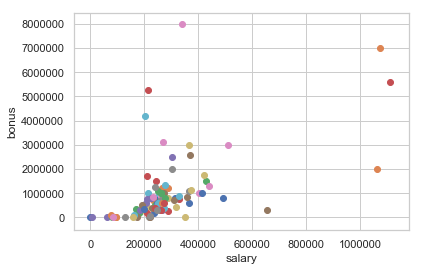

In [185]:
# Re-plotting Bonus vs Salary after I removed 'Total'

features = ["salary", "bonus"]

data = featureFormat(my_dataset, features)

for point in data:
    salary = point[0]
    bonus = point[1]
    plt.scatter( salary, bonus )

plt.xlabel("salary")
plt.ylabel("bonus")

In [186]:
# Exploring Bonus Outliers

from pprint import pprint
bonus_outliers = []
for key in my_dataset:
    val = my_dataset[key]['bonus']
    if val == 'NaN':
        continue
    bonus_outliers.append((key,int(val)))

pprint(sorted(bonus_outliers,key=lambda x:x[1],reverse=True)[:2])

[('LAVORATO JOHN J', 8000000), ('LAY KENNETH L', 7000000)]


In [150]:
# Exploring Salary Outliers

salary_outliers = []
for key in my_dataset:
    val = my_dataset[key]['salary']
    if val == 'NaN':
        continue
    salary_outliers.append((key,int(val)))

pprint(sorted(salary_outliers,key=lambda x:x[1],reverse=True)[:2])

[('SKILLING JEFFREY K', 1111258), ('LAY KENNETH L', 1072321)]


609.0


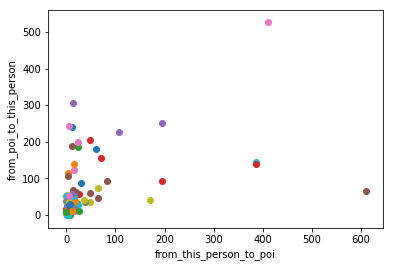

In [151]:
#Plotting from person to POI vs. from POI to person, Checking for the outliers
import matplotlib.pyplot

features = ["from_this_person_to_poi", "from_poi_to_this_person"]
data = featureFormat(my_dataset, features)


### your code below
print data.max()
for point in data:
    from_this_person_to_poi = point[0]
    from_poi_to_this_person = point[1]
    matplotlib.pyplot.scatter( from_this_person_to_poi, from_poi_to_this_person )

matplotlib.pyplot.xlabel("from_this_person_to_poi")
matplotlib.pyplot.ylabel("from_poi_to_this_person")
matplotlib.pyplot.show()

In [152]:
#To POI outliers

to_poi_outliers = []
for key in my_dataset:
    val = my_dataset[key]['from_this_person_to_poi']
    if val == 'NaN':
        continue
    to_poi_outliers.append((key,int(val)))

pprint(sorted(to_poi_outliers,key=lambda x:x[1],reverse=True)[:2])

[('DELAINEY DAVID W', 609), ('LAVORATO JOHN J', 411)]


In [153]:
#From POI to Outliers

from_poi_outliers = []
for key in my_dataset:
    val = my_dataset[key]['from_poi_to_this_person']
    if val == 'NaN':
        continue
    from_poi_outliers.append((key,int(val)))

pprint(sorted(from_poi_outliers,key=lambda x:x[1],reverse=True)[:2])

[('LAVORATO JOHN J', 528), ('DIETRICH JANET R', 305)]


So I also found several outliers when it came to Bonuses and Salary, but kept those outliers because they could help identify Persons of Interest.

### Question 2
What features did you end up using in your POI identifier, and what selection process did you use to pick them? Did you have to do any scaling? Why or why not? As part of the assignment, you should attempt to engineer your own feature that does not come ready-made in the dataset -- explain what feature you tried to make, and the rationale behind it. (You do not necessarily have to use it in the final analysis, only engineer and test it.) In your feature selection step, if you used an algorithm like a decision tree, please also give the feature importances of the features that you use, and if you used an automated feature selection function like SelectKBest, please report the feature scores and reasons for your choice of parameter values. 

In [191]:
'''
Want to try running some algorithms with all of the features just to get a baseline.  
Only removed the 'email_addresses' feature from the list. (This feature will not help during analysis.)

Going to try Random Forrest, Decision Tree and Adaboost.
'''


### Extract features and labels from dataset for local testing Only 'email_address' was excluded
'''features_list = ['poi',
 'bonus',
 'deferral_payments',
 'deferred_income',
 'director_fees',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'loan_advances',
 'long_term_incentive',
 'other',
 'restricted_stock',
 'restricted_stock_deferred',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']
'''


#Feature_list = All features except 'email_address', loan advances', 'director_fees', 'restricted_stock deferred', 
#'deferral_payments', 'deferred_income', 'long_term_incentive'

features_list = ['poi',
 'bonus',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'other',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']


data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [192]:
#Random Forrest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

clf = RandomForestClassifier()
clf.fit(features_train, labels_train)

pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)

print "Random Forrest Accuracy :", accuracy
print "training time:", round(time()-t0, 3), "s"
print
report = classification_report(labels_test, pred)
print report

Random Forrest Accuracy : 0.8604651162790697
training time: 3291.15 s

              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93        38
         1.0       0.00      0.00      0.00         5

   micro avg       0.86      0.86      0.86        43
   macro avg       0.44      0.49      0.46        43
weighted avg       0.78      0.86      0.82        43



In [193]:
#Decision Tree

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(features_train, labels_train)

pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)

print "Decision Tree Accuracy :", accuracy
print "training time:", round(time()-t0, 2), "s"
print 'Precision :', precision
print 'Recall :', recall
print
report = classification_report(labels_test, pred)
print report

Decision Tree Accuracy : 0.7906976744186046
training time: 3293.19 s
Precision : 0.16666666666666666
Recall : 0.2

              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88        38
         1.0       0.17      0.20      0.18         5

   micro avg       0.79      0.79      0.79        43
   macro avg       0.53      0.53      0.53        43
weighted avg       0.81      0.79      0.80        43



In [194]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)


print "AdaBoost Accuracy :", accuracy
print "training time:", round(time()-t0, 3), "s"
print 'Precision :', precision
print 'Recall :', recall
print
report = classification_report(labels_test, pred)
print report

AdaBoost Accuracy : 0.8372093023255814
training time: 3294.975 s
Precision : 0.25
Recall : 0.2

              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91        38
         1.0       0.25      0.20      0.22         5

   micro avg       0.84      0.84      0.84        43
   macro avg       0.57      0.56      0.57        43
weighted avg       0.82      0.84      0.83        43



### Create New Features

In [195]:
# Create new feature
# Creating a ratio for 'from_poi_to_this_person' and 'from_this_person_to_poi'

def create_ratio(my_dataset, ratio_name, numerator, denominator):
    for person in my_dataset:
        if my_dataset[person][numerator] == 'NaN' or my_dataset[person][denominator] == 'NaN':
                my_dataset[person][ratio_name] = 'NaN'
        else:
            my_dataset[person][ratio_name] = float(my_dataset[person][numerator])/float(my_dataset[person][denominator])
    return my_dataset

In [196]:
my_dataset = create_ratio(my_dataset, 'from_poi_ratio', 'from_poi_to_this_person', 'to_messages' )
my_dataset = create_ratio(my_dataset, 'to_poi_ratio', 'from_this_person_to_poi', 'from_messages' )

In [197]:
features_list.append('from_poi_ratio')
features_list.append('to_poi_ratio')

In [198]:
enron_df = pd.DataFrame(data_dict)
enron_df = enron_df.T
enron_df

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_ratio,from_poi_to_this_person,...,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,to_poi_ratio,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,0.0161957,47,...,152,False,126027,-126027,201955,1407,2902,0.0296128,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,0.0689046,39,...,864523,False,1757552,-560222,477,465,566,0,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,2660303,False,3942714,NaN,267102,NaN,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,69,False,145796,-82782,239671,NaN,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,874,False,NaN,NaN,80818,NaN,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,0.0196856,144,...,566,False,126027,NaN,231330,2639,7315,0.0888787,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,0.0285321,228,...,210698,True,157569,NaN,213999,5521,7991,0.22314,5501630,1110705
BELFER ROBERT,NaN,NaN,-102500,102500,NaN,3285,3285,NaN,NaN,NaN,...,NaN,False,44093,-44093,NaN,NaN,NaN,NaN,102500,NaN
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,False,869220,NaN,216582,NaN,NaN,NaN,228474,2493616


I have chosen the following features.  I manually selected these by eliminating any feature that had more than 65 NaN's.

features_list = ['poi',
 'to_poi_ratio',
 'from_poi_ratio',                
 'bonus',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'other',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']



### Question 3:
What algorithm did you end up using? What other one(s) did you try? How did model performance differ between algorithms? 

Testing different classifiers

In [199]:
### Extract features and labels from dataset for local testing
features_list = ['poi',
 'to_poi_ratio',
 'from_poi_ratio',                
 'bonus',
 'exercised_stock_options',
 'expenses',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'other',
 'restricted_stock',
 'salary',
 'shared_receipt_with_poi',
 'to_messages',
 'total_payments',
 'total_stock_value']

data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

from sklearn.model_selection import train_test_split

features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [202]:
#Random Forrest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

clf = RandomForestClassifier()
clf.fit(features_train, labels_train)

pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)

print "Random Forrest Accuracy :", accuracy
print "training time:", round(time()-t0, 3), "s"
print
report = classification_report(labels_test, pred)
print report

Random Forrest Accuracy : 0.8837209302325582
training time: 3593.963 s

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.94        38
         1.0       0.50      0.20      0.29         5

   micro avg       0.88      0.88      0.88        43
   macro avg       0.70      0.59      0.61        43
weighted avg       0.86      0.88      0.86        43



In [203]:
#Decision Tree

from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(features_train, labels_train)

pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)

print "Decision Tree Accuracy :", accuracy
print "training time:", round(time()-t0, 2), "s"
print 'Precision :', precision
print 'Recall :', recall
print
report = classification_report(labels_test, pred)
print report

Decision Tree Accuracy : 0.8604651162790697
training time: 3595.72 s
Precision : 0.3333333333333333
Recall : 0.2

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        38
         1.0       0.33      0.20      0.25         5

   micro avg       0.86      0.86      0.86        43
   macro avg       0.62      0.57      0.59        43
weighted avg       0.83      0.86      0.84        43



In [204]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier()
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)


print "AdaBoost Accuracy :", accuracy
print "training time:", round(time()-t0, 3), "s"
print 'Precision :', precision
print 'Recall :', recall
print
report = classification_report(labels_test, pred)
print report

AdaBoost Accuracy : 0.8604651162790697
training time: 3597.86 s
Precision : 0.3333333333333333
Recall : 0.2

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        38
         1.0       0.33      0.20      0.25         5

   micro avg       0.86      0.86      0.86        43
   macro avg       0.62      0.57      0.59        43
weighted avg       0.83      0.86      0.84        43



I tried Random Forrest, Decision Tree and Adaboost with default parameters and without any tuning.  I tested these algorithms with the same training and test data and got different results.  These algorithms produced different accuracy ratings, precision and recall.  Based on those results, I decided that Decision Tree will be the best option to go with.  Then I took Decision Tree and started trying different parameters for tuning.



### Question 4:
What does it mean to tune the parameters of an algorithm, and what can happen if you don’t do this well? How did you tune the parameters of your particular algorithm? What parameters did you tune?


Tuning the parameters of an algorithm means testing out different parameter values to find the combination that optimizes the result of the algorithm.  The purpose of this tuning is to find the best performance.  If we do not tune the parameters we might not get the best performance from the algorithm.

In [207]:
#Decision Tree

from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(features_train, labels_train)

pred = clf.predict(features_test)
accuracy = accuracy_score(pred,labels_test)
precision = precision_score(labels_test, pred)
recall = recall_score(labels_test, pred)

print "Decision Tree Accuracy :", accuracy
print "training time:", round(time()-t0, 2), "s"
print 'Precision :', precision
print 'Recall :', recall
print
report = classification_report(labels_test, pred)
print report

Decision Tree Accuracy : 0.8604651162790697
training time: 5061.8 s
Precision : 0.4444444444444444
Recall : 0.8

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92        38
         1.0       0.44      0.80      0.57         5

   micro avg       0.86      0.86      0.86        43
   macro avg       0.71      0.83      0.74        43
weighted avg       0.91      0.86      0.88        43



Entropy controls how a Decision Tree decides to split the data.  With this I have achieved a precision> 0.30 and a recall > 0.30.

### Question 5:
What is validation, and what’s a classic mistake you can make if you do it wrong? How did you validate your analysis?  [relevant rubric items: “discuss validation”, “validation strategy”]

#### Answer 5
Validation is the process where a trained model is evaluated with a testing data set. The testing data set is a separate portion of the same data set from which the training set is derived. The main purpose of using the testing data set is to test the generalization ability of a trained model.  The classic mistake in validation is overfitting. 

I separated the data into training, testing, and validation sets. Test size was 30% of the data and Train size was 70% of the data.  This was done by using train_test_split in sklearn.


### Question 6:
Give at least 2 evaluation metrics and your average performance for each of them.  Explain an interpretation of your metrics that says something human-understandable about your algorithm’s performance. [relevant rubric item: “usage of evaluation metrics”]

The evaluation metrics I used were precision, recall, and F1.

Precision <br>
>Precision = (True Positive) / (True Positive+False positive) <br>
>My precision is 35%, which means that 35% of the people were positively identified as POI's

Recall <br>
>Recall = (True Positives) / (True Positives+False Negatives) <br>
>My recall is 36%, which means that this decision tree correctly identified 36% as being a POI<br>
>I believe a higher recall is a better metric in this situation because it will tag the true POI's more efficiently and have a less likely chance of tagging innocent people as POI's


F1 <br>
>F1 = 2 * (Precision*Recall) / (Precision+Recall) <br>
>F1 combines the precision and recall.  Mt F1 score is 36%


### References

<ul>
    <li>https://stackoverflow.com/questions/53899066/what-could-be-the-reason-for-typeerror-stratifiedshufflesplit-object-is-not</li>
    <li>https://towardsdatascience.com/understanding-hyperparameters-optimization-in-deep-learning-models-concepts-and-tools-357002a3338a</li>
    <li>https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9</li>
    <li>https://link.springer.com/referenceworkentry/10.1007%2F978-1-4419-9863-7_233</li>
</ul>